In [56]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import requests

In [28]:
df = pd.read_csv('tables/geographical_co-author_country.csv')

In [29]:
def ranking(column_name,df,geographical_rank,new_col,num):
    temp_df = df.sort_values(column_name,ascending=False).iloc[:num]
    temp_df.set_index([pd.Index(list(range(1,num+1)))],drop=True,inplace=True)
    temp_df.head()
    row=[]
    for i in range(1,num+1):
        row.append((temp_df.loc[i,'label']+
               " ("+str(temp_df.loc[i,column_name])+")").title())
    geographical_rank[new_col]=row
    return geographical_rank

In [30]:
num=10
geographical_data=pd.DataFrame()
geographical_data['Rank']=list(range(1,num+1))
ranking("weight<Citations>",df,geographical_data,"Citations",num)
ranking("weight<Documents>",df,geographical_data,"Publications",num)
ranking("weight<Links>",df,geographical_data,"Co-Author",num)
ranking("weight<Total link strength>",df,geographical_data,"Total Co-Authorship",num)
geographical_data.to_csv('geographical_coauthor.csv')

In [31]:
df = pd.read_csv("tables/productivity_infuence_co-author.csv")

In [32]:
num=10
temp_df = df.sort_values("weight<Documents>",ascending=False).iloc[:num]
temp_df.reset_index(drop=True,inplace=True)
row=[]
author_return=pd.DataFrame()
author_return['Rank']=list(range(1,num+1))
for i in range(num):
    name = temp_df.loc[i,'label'].title().split(",")
    row.append("Dr."+name[1]+" "+name[0])
row
author_return['Author']=row
author_return['Documents']=temp_df['weight<Documents>']
author_return['Citations']=temp_df['weight<Citations>']
author_return['Co-Authorship']=temp_df['weight<Links>']
author_return['Overall Co-Authorship']=temp_df['weight<Total link strength>']
author_return
author_return.to_csv("productive_author.csv")

In [33]:
num=10
temp_df = df.sort_values("weight<Citations>",ascending=False).iloc[:num]
temp_df.reset_index(drop=True,inplace=True)
row=[]
author_return=pd.DataFrame()
author_return['Rank']=list(range(1,num+1))
for i in range(num):
    name = temp_df.loc[i,'label'].title().split(",")
    row.append("Dr."+name[1]+" "+name[0])
row
author_return['Author']=row
author_return['Citations']=temp_df['weight<Citations>']
author_return['Documents']=temp_df['weight<Documents>']
author_return['Co-Authorship']=temp_df['weight<Links>']
author_return['Overall Co-Authorship']=temp_df['weight<Total link strength>']
author_return
author_return.to_csv("infulencial_author.csv")

In [34]:
df = pd.read_csv("tables/journal_document_citation.csv")

In [39]:
num=10
temp_df=df.sort_values("weight<Documents>",ascending=False).iloc[:num]
journals_number_article = pd.DataFrame()
journals_number_article['Journal'] = temp_df['label']
journals_number_article['Journal'] = journals_number_article['Journal'].str.title() 
journals_number_article['Documents'] = temp_df['weight<Documents>']
journals_number_article.sort_values("Journal",inplace=True)
journals_number_article.set_index([pd.Index(list(range(1,num+1)))],
                                 drop=True,inplace=True)

temp_df=df.sort_values("weight<Citations>",ascending=False).iloc[:num]
journals_citations= pd.DataFrame()
journals_citations['Journal'] = temp_df['label']
journals_citations['Journal'] = journals_citations['Journal'].str.title() 
journals_citations['Citations'] = temp_df['weight<Citations>']
journals_citations.sort_values("Journal",inplace=True)
journals_citations.set_index([pd.Index(list(range(1,num+1)))],
                                 drop=True,inplace=True)

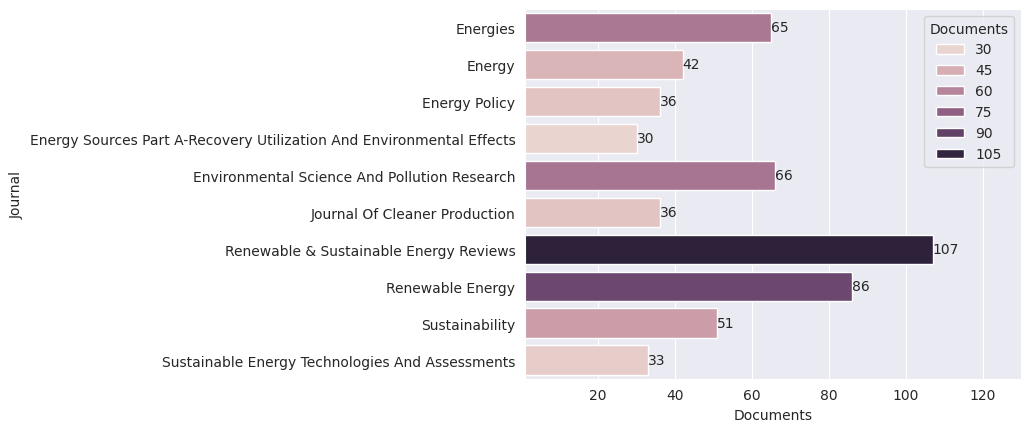

In [40]:
sns.set_style("darkgrid")
ax = sns.barplot(journals_number_article,x='Documents',y='Journal',
                 hue='Documents',orient='h')
ax.set_xlim(1, 130)
for i in ax.containers:
    ax.bar_label(i,fontsize=10)

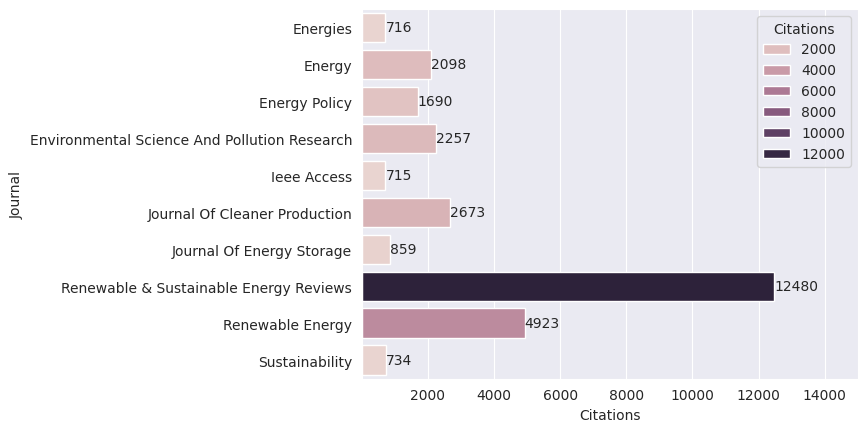

In [41]:
sns.set_style("darkgrid")
ax = sns.barplot(journals_citations,x='Citations',y='Journal',
                 hue='Citations',orient='h')
ax.set_xlim(1, 15000)
for i in ax.containers:
    ax.bar_label(i,fontsize=10)

In [5]:
df = pd.read_csv("tables/article_citation.csv")

In [94]:
def doiToAPA(url):
    r = requests.get(url, headers = {'accept':'text/x-bibliography; style=apa'})
    return r.text

In [27]:
num = 10
temp_df = df.sort_values("weight<Citations>",ascending=False).iloc[:num]
temp_df.reset_index(inplace=True)
article_citations = pd.DataFrame()
article_citations['Rank'] = list(range(1,num+1))
article_citations['Article']=temp_df['label']
# article_citations=article_citations['Article'].str.title()
details = temp_df['description'].to_list()
title=[]
source=[]
for i in details:
    i=i.replace('</tr>',"").replace('<td>',"").replace('</td>',"")
    i=i.replace('<sub>',"").replace('</sub>',"").split('<tr>')
    title.append(i[2][6:].capitalize())
    source.append(i[3][7:].title().split(',')[0])
article_citations['Journel']=source
article_citations['Title']=title
article_citations['Citations']=temp_df['weight<Citations>']
article_citations['Cite']=[doiToAPA(i) for i in temp_df['url']]
article_citations.to_csv('article_citations.csv')

In [2]:
df = pd.read_csv("tables/year.txt",sep="\t")
# df = df.iloc[:-1]
df = df.drop(df[df['Publication Years'] == 2023].index)
df.sort_values("Publication Years",inplace=True)
df.reset_index(drop=True,inplace=True)
cumsum = []
sum=0
for i in range(len(df)):
    sum=sum+df.iloc[i,1]
    cumsum.append(sum)
df['cumsum']=cumsum
df

,Publication Years,Record Count,"% of 1,566",cumsum
0,2010,17,1.086,17
1,2011,29,1.852,46
2,2012,30,1.916,76
3,2013,33,2.107,109
4,2014,27,1.724,136
5,2015,31,1.980,167
6,2016,68,4.342,235
7,2017,79,5.045,314
8,2018,84,5.364,398
9,2019,113,7.216,511


['2010', '2012', '2014', '2016', '2018', '2020', '2022']


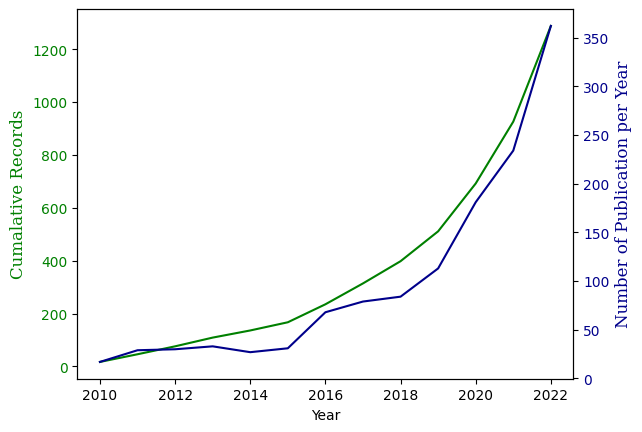

In [29]:
# sns.lineplot(data=df,x="Publication Years",y="Record Count")
# sns.lineplot(data=df,x="Publication Years",y="cumsum",orient ='y')
font = {'family':'serif','color':'darkblue','size':12}
font1 = {'family':'serif','color':'green','size':12}
dates = [str(i) for i in list(range(2010,2023,2))]
print(dates)
fig, ax = plt.subplots()
plt.xlabel("Year")
# Plot linear sequence, and set tick labels to the same color
ax.plot(df['cumsum'], color='green')
ax.tick_params(axis='y', labelcolor='green')
plt.ylabel('Cumalative Records',fontdict=font1)
# Generate a new Axes instance, on the twin-X axes (same position)
ax2 = ax.twinx()

# Plot exponential sequence, set scale to logarithmic and change tick color
ax2.plot(df['Record Count'], color='darkblue')
# ax2.set_yscale('log')
ax2.tick_params(axis='y', labelcolor='darkblue')
plt.ylabel('Number of Publication per Year',fontdict=font)
plt.xticks(np.arange(0, 13,2),dates, rotation=45)
# ax2.set_xticklabels(dates)
plt.show()

In [378]:
from sklearn.linear_model import LinearRegression

AttributeError: module 'numpy.linalg._umath_linalg' has no attribute '_ilp64'

In [375]:
from scipy.stats import linregress
data = df['Record Count']
# data = [12, 34, 29, 38, 34, 51, 29, 34, 47, 34, 55, 94, 68, 81]
x = np.arange(1,len(data)+1)
y=np.array(data)
res = linregress(x, y)
print(f'Equation: {res[0]:.3f} * t + {res[1]:.3f}, R^2: {res[2] ** 2:.2f} ')
res

AttributeError: module 'numpy.linalg._umath_linalg' has no attribute '_ilp64'

In [30]:
df_bib_coup = pd.read_csv('tables/bibliographical_coupling.csv')

In [ ]:
for i in sorted(df_bib_coup['cluster'].unique()):
    print(i, len(df_bib_coup[df_bib_coup['cluster']==i]))

In [112]:
df_by_top_cluster = pd.DataFrame()
for i in sorted(df_bib_coup['cluster'].unique(),reverse=True):
    if i<=5:
        df_by_top_cluster=pd.concat([df_bib_coup[df_bib_coup['cluster']==i].sort_values(
            by=['weight<Citations>'],ascending=False).iloc[:5],df_by_top_cluster],ignore_index = True)

In [113]:
df_clusters=pd.DataFrame()
title=[]
for idx,ele in enumerate(df_by_top_cluster['description']):
    ele = ele.split('<tr>')[2]
    ele = ele.replace('<td>',"").replace('</td>','')
    ele = ele.replace('</tr>','').replace('Title:','')
    ele = ele.replace('<sub>',' ').replace('</sub>', '')
    title.append(ele.capitalize())
df_clusters['Title']=title
df_clusters['Cluster']=df_by_top_cluster['cluster']
df_clusters['Citations']=df_by_top_cluster['weight<Citations>']
citaions=[]
for idx,ele in enumerate(df_by_top_cluster['url']):
    citations.append(doiToAPA(ele))
df_clusters['cite']=citations

In [133]:
df_clusters.to_csv('resources/bibliographical coupling/cluster.csv')

In [135]:
df_clusters

,Title,Cluster,Citations,cite
0,Hybrid renewable energy systems for power gene...,1,490,"Bajpai, P., & Dash, V. (2012). Hybrid renewabl..."
1,Applications of fuzzy logic in renewable energ...,1,302,"Suganthi, L., Iniyan, S., & Samuel, A. A. (201..."
2,Protection challenges under bulk penetration o...,1,268,"Telukunta, V., Pradhan, J., Agrawal, A., Singh..."
3,A review on hybrid renewable energy systems,1,191,"Shivarama Krishna, K., & Sathish Kumar, K. (20..."
4,Recently developed reduced switch multilevel i...,1,153,"Bana, P. R., Panda, K. P., Naayagi, R. T., Sia..."
5,Role of renewable energy sources in environmen...,2,2024,"Panwar, N. L., Kaushik, S. C., & Kothari, S. (..."
6,A review of multi criteria decision making (mc...,2,791,"Kumar, A., Sah, B., Singh, A. R., Deng, Y., He..."
7,Multi-criteria decision-making in the selectio...,2,429,"San CristÃ³bal, J. R. (2011). Multi-criteria d..."
8,Barriers to renewable/sustainable energy techn...,2,316,"Luthra, S., Kumar, S., Garg, D., & Haleem, A. ..."
9,Determinants of renewable energy growth: a glo...,2,273,"Aguirre, M., & Ibikunle, G. (2014). Determinan..."
